<a href="https://colab.research.google.com/github/auspicious0/BreastCancer/blob/main/DesicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#우선 패키지를 부착하고 출력 그래프의 크기를 설정한다.
install.packages(c("tidyverse","data.table"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(data.table)
library(repr)

options(repr.plot.width=7,repr.plot.height=7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
#https://drive.google.com/file/d/1Ow8SNjYJeDw69wCJngsaQLqmaFC0PrDn/view?usp=drive_link
system("gdown --id 1Ow8SNjYJeDw69wCJngsaQLqmaFC0PrDn")
system("ls",TRUE)


[1] "BreastCancerData.csv" "sample_data"

캐글에서 유방암 데이터를 활용해 프로젝트를 진행하겠습니다.

In [4]:
bc<-fread("BreastCancerData.csv",encoding="UTF-8")%>%as_tibble()
bc%>%show()

Warning message in fread("BreastCancerData.csv", encoding = "UTF-8"):
“Detected 33 column names but the data has 32 columns. Filling rows automatically. Set fill=TRUE explicitly to avoid this warning.”


# A tibble: 569 × 33
         id diagnosis radius_mean texture_mean perimeter_mean area_mean
      <int> <chr>           <dbl>        <dbl>          <dbl>     <dbl>
 1   842302 M                18.0         10.4          123.      1001 
 2   842517 M                20.6         17.8          133.      1326 
 3 84300903 M                19.7         21.2          130       1203 
 4 84348301 M                11.4         20.4           77.6      386.
 5 84358402 M                20.3         14.3          135.      1297 
 6   843786 M                12.4         15.7           82.6      477.
 7   844359 M                18.2         20.0          120.      1040 
 8 84458202 M                13.7         20.8           90.2      578.
 9   844981 M                13           21.8           87.5      520.
10 84501001 M                12.5         24.0           84.0      476.
# ℹ 559 more rows
# ℹ 27 more variables: smoothness_mean <dbl>, compactness_mean <dbl>,
#   concavity_mean <dbl>, `

(breast cancer)데이터가 bc에 잘 읽혀진 것을 확인했습니다.
불러온 데이터를 살펴보기 위해 summary, str(데이터 형태 확인), table(결측값 확인) 함수를 수행해보고 boxplot(이상값 확인)를 통해 시각화 해보겠습니다.

tibble [569 × 33] (S3: tbl_df/tbl/data.frame)
 $ id                     : int [1:569] 842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : chr [1:569] "M" "M" "M" "M" ...
 $ radius_mean            : num [1:569] 18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num [1:569] 10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num [1:569] 122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num [1:569] 1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num [1:569] 0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num [1:569] 0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num [1:569] 0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave points_mean    : num [1:569] 0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num [1:569] 0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num [1:569] 0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : nu

       id             diagnosis          radius_mean      texture_mean  
 Min.   :     8670   Length:569         Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   Class :character   1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024   Mode  :character   Median :13.370   Median :18.84  
 Mean   : 30371831                      Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129                      3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502                      Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.


FALSE  TRUE 
18208   569 

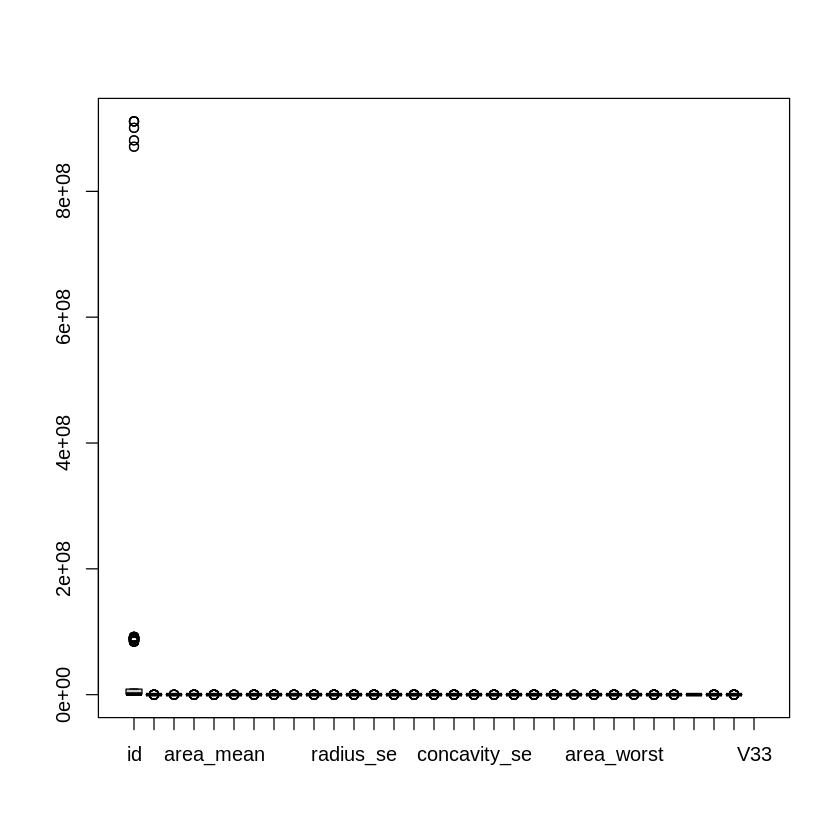

In [5]:
str(bc)
bc%>%summary()
table(is.na(bc))
bc_<-select(bc,-diagnosis)#char형 변수를 제외하고 정수형 변수만을 저장한 bc_를 통해 boxplot
#을 그려보겠습니다.
boxplot(bc_)


V33 변수는 모두 결측값으로 이루어져 있습니다. V33를 제외한 변수들은 결측값이 없습니다.                    .


diagnosis(진단)변수를 factor형 변수로 변환해야 할 것으로 보이고 id(주민번호) 변수와 V33(결측값으로 이루어진 변수)를 삭제해야 할 것으로 보입니다.


데이터의 값이 너무 작으므로 이상값이 명확히 확인이 되지 않지만 존재하는 것 같으므로 이상값처리를 진행하겠습니다.



In [6]:
bc$M %>% unique()


Warning message:
“Unknown or uninitialised column: `M`.”


NULL

In [7]:
bc <- select(bc,-id,-V33) %>%
      mutate_at("diagnosis",factor)

In [8]:
bc %>% str()
bc %>% show()
table(is.na(bc))

tibble [569 × 31] (S3: tbl_df/tbl/data.frame)
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num [1:569] 18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num [1:569] 10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num [1:569] 122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num [1:569] 1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num [1:569] 0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num [1:569] 0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num [1:569] 0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave points_mean    : num [1:569] 0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num [1:569] 0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num [1:569] 0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num [1:569] 1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num [1:569] 0.905 0.734 0.787 1.


FALSE 
17639 

삭제처리와 factor형으로 잘 변환되었습니다. 이제 이상값 처리를 진행하겠습니다.


FALSE 
17639 


FALSE  TRUE 
17048   591 


FALSE 
12338 

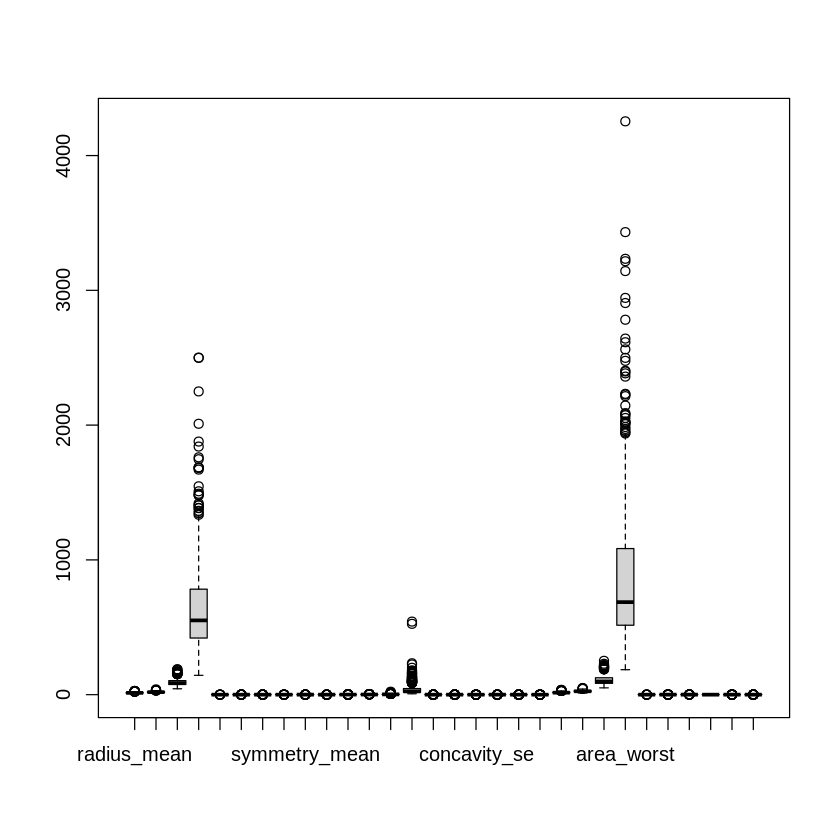

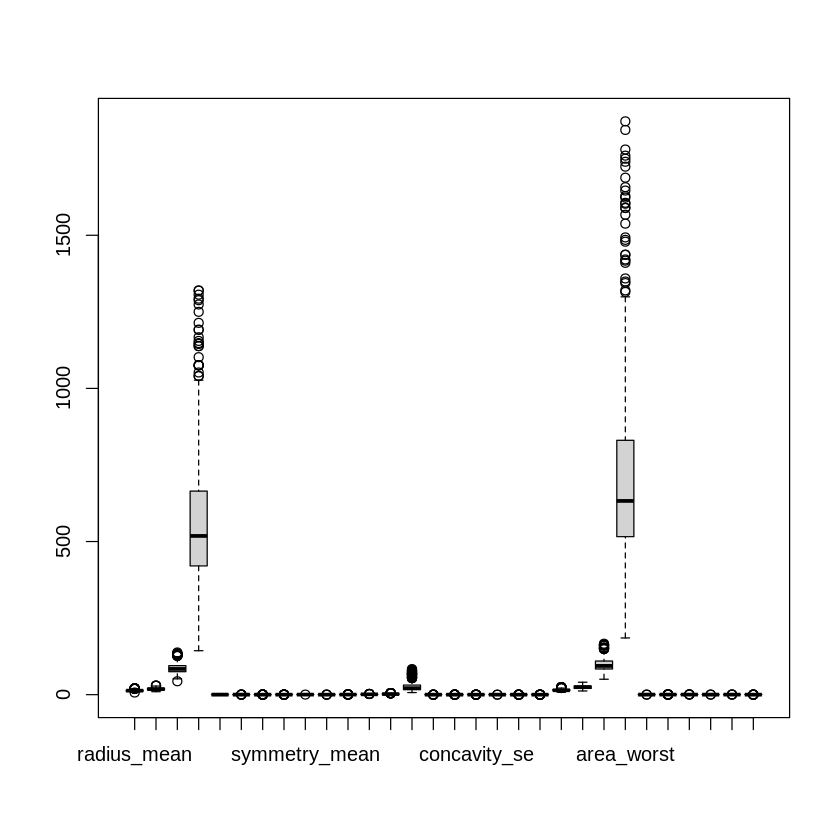

In [9]:
# 이상치 및 결측값 처리 함수
calculate_outliers <- function(data, column_name) {
  iqr_value <- IQR(data[[column_name]])
  upper_limit <- summary(data[[column_name]])[5] + 1.5 * iqr_value
  lower_limit <- summary(data[[column_name]])[2] - 1.5 * iqr_value

  data[[column_name]] <- ifelse(data[[column_name]] < lower_limit | data[[column_name]] > upper_limit, NA, data[[column_name]])

  return(data)
}
table(is.na(bc))
bc_<-select(bc,-diagnosis)#char형 변수를 제외하고 정수형 변수만을 저장한 bc_를 통해 boxplot
boxplot(bc_)
# 이상치 및 결측값 처리 및 결과에 대한 상자그림 그리기
bc <- calculate_outliers(bc, "radius_mean")
bc <- calculate_outliers(bc, "texture_mean")
bc <- calculate_outliers(bc, "perimeter_mean")
bc <- calculate_outliers(bc, "area_mean")
bc <- calculate_outliers(bc, "smoothness_mean")
bc <- calculate_outliers(bc, "compactness_mean")
bc <- calculate_outliers(bc, "concavity_mean")
bc <- calculate_outliers(bc, "concave points_mean")
bc <- calculate_outliers(bc, "symmetry_mean")
bc <- calculate_outliers(bc, "fractal_dimension_mean")
bc <- calculate_outliers(bc, "radius_se")
bc <- calculate_outliers(bc, "texture_se")
bc <- calculate_outliers(bc, "perimeter_se")
bc <- calculate_outliers(bc, "area_se")
bc <- calculate_outliers(bc, "smoothness_se")
bc <- calculate_outliers(bc, "compactness_se")
bc <- calculate_outliers(bc, "concavity_se")
bc <- calculate_outliers(bc, "concave points_se")
bc <- calculate_outliers(bc, "symmetry_se")
bc <- calculate_outliers(bc, "fractal_dimension_se")
bc <- calculate_outliers(bc, "texture_worst")
bc <- calculate_outliers(bc, "perimeter_worst")
bc <- calculate_outliers(bc, "area_worst")
bc <- calculate_outliers(bc, "smoothness_worst")
bc <- calculate_outliers(bc, "compactness_worst")
bc <- calculate_outliers(bc, "concavity_worst")
bc <- calculate_outliers(bc, "concave points_worst")
bc <- calculate_outliers(bc, "symmetry_worst")
bc <- calculate_outliers(bc, "fractal_dimension_worst")


table(is.na(bc))
bc <- na.omit(bc)
table(is.na(bc))
bc_<-select(bc,-diagnosis)#char형 변수를 제외하고 정수형 변수만을 저장한 bc_를 통해 boxplot
#을 그려보겠습니다.
boxplot(bc_)

이상값 처리를 완료하였습니다.

Decision Tree 분석 rpart()를 수행하기 위해 우선 train 데이터와 test 데이터로 데이터를 분리하겠습니다. (데이터가 충분하지않으므로  9:1으로 분할하겠습니다.)

그런데 무작위로 데이터를 분리하지 않고 diagnosis 를 기준으로 데이터를 분할하기 위해 caret을 install해 createDataPartition를 활용하겠습니다.

In [19]:
install.packages("caret")
library(caret)
set.seed(31) #다음번 계산 때도 동일한 값으로 분할될 수 있도록 조치

index <- caret::createDataPartition(y = bc$diagnosis, p = 0.9, list=FALSE)
train <- bc[index,]
test <- bc[-index,]

train %>% show()
test %>% show()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 359 × 31
   diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean
   <fct>           <dbl>        <dbl>          <dbl>     <dbl>           <dbl>
 1 M               18.2          20.0          120.      1040           0.0946
 2 M               13.7          20.8           90.2      578.          0.119 
 3 M               16.0          23.2          103.       798.          0.0821
 4 M               15.8          17.9          104.       781           0.0971
 5 M               15.8          24.0          104.       783.          0.0840
 6 M               14.7          20.1           94.7      684.          0.0987
 7 M               16.1          20.7          108.       799.          0.117 
 8 B               13.5          14.4           87.5      566.          0.0978
 9 B               13.1          15.7           85.6      520           0.108 
10 B                9.50         12.4           60.3      274.          0.102 
# ℹ 349 more rows
# ℹ 25 more v

이제 train 데이터를 가지고 DecisionTree 모델을 학습하겠습니다. 또 Variable importance를 확인하여 diagnosis에 가장 큰 영향을 미치는 인자를 확인하겠습니다.

In [20]:
install.packages("rpart")
library(rpart)

model_bc <- rpart(formula = diagnosis ~ ., data= train, method = "class")
summary(model_bc)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = diagnosis ~ ., data = train, method = "class")
  n= 359 

          CP nsplit rel error    xerror       xstd
1 0.67415730      0 1.0000000 1.0000000 0.09192627
2 0.06741573      1 0.3258427 0.5056180 0.07049103
3 0.06179775      2 0.2584270 0.4606742 0.06771241
4 0.01000000      4 0.1348315 0.3146067 0.05708944

Variable importance
        radius_worst           area_worst      perimeter_worst 
                  16                   15                   13 
           area_mean          radius_mean       perimeter_mean 
                  13                   13                   12 
        texture_mean        texture_worst concave points_worst 
                   3                    3                    3 
      concavity_mean           texture_se  concave points_mean 
                   1                    1                    1 
   compactness_worst      concavity_worst     compactness_mean 
                   1                    1                    1 
    

CP 0.01로 더이상 분기하지 않습니다.
그 지점의 오류율(rel_error)과 교차검증오류율(xerror),교차검증오류의 표준편차(xstd)의 값을 확인합니다.

이 지점은 가지치기(pruning) 을 위한 최적의 lowest level  선택에 사용됩니다.

Variable importance 값은 둘레(perimeter_worst)이 가장 크고 반경(radius_worst), 지역(area_worst)이 그 다음을 차지합니다.

그 다음으로 모델에 관한 설명이 나오는데 이는 그림을 통해 살펴보겠습니다.


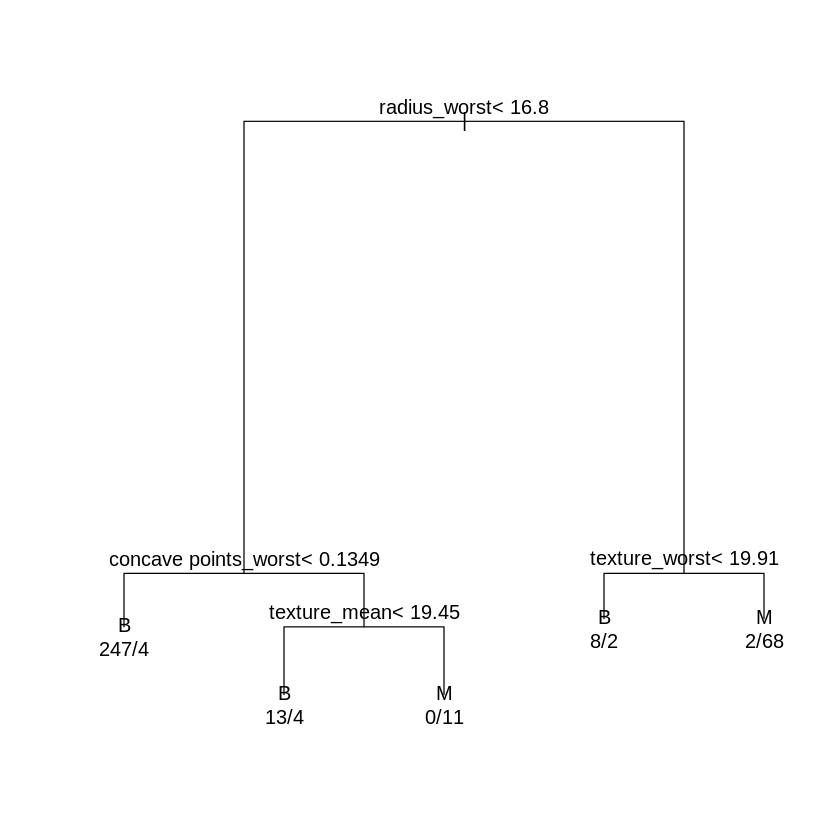

In [21]:
par(mfrow = c(1,1), xpd = NA)
plot(model_bc)
text(model_bc, use.n = TRUE)

위 그림은 식별이 어렵습니다. 따라서 더 식별이 편한 그림으로 바꿔 보겠습니다.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



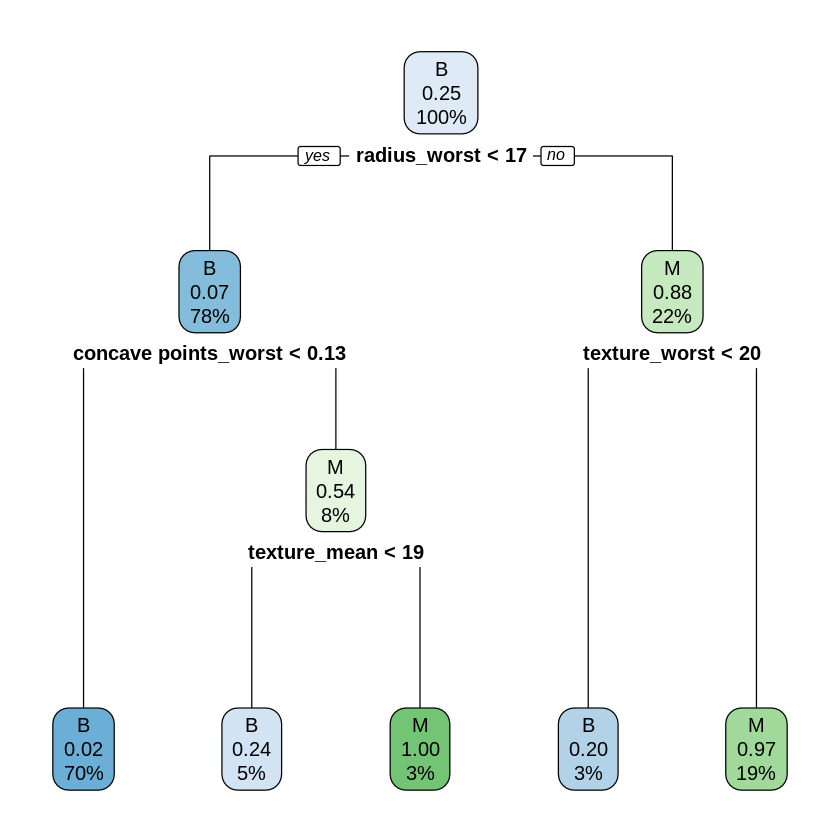

In [24]:
install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(model_bc)

다른 방식으로도 그려보고 분석해 보겠습니다.

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



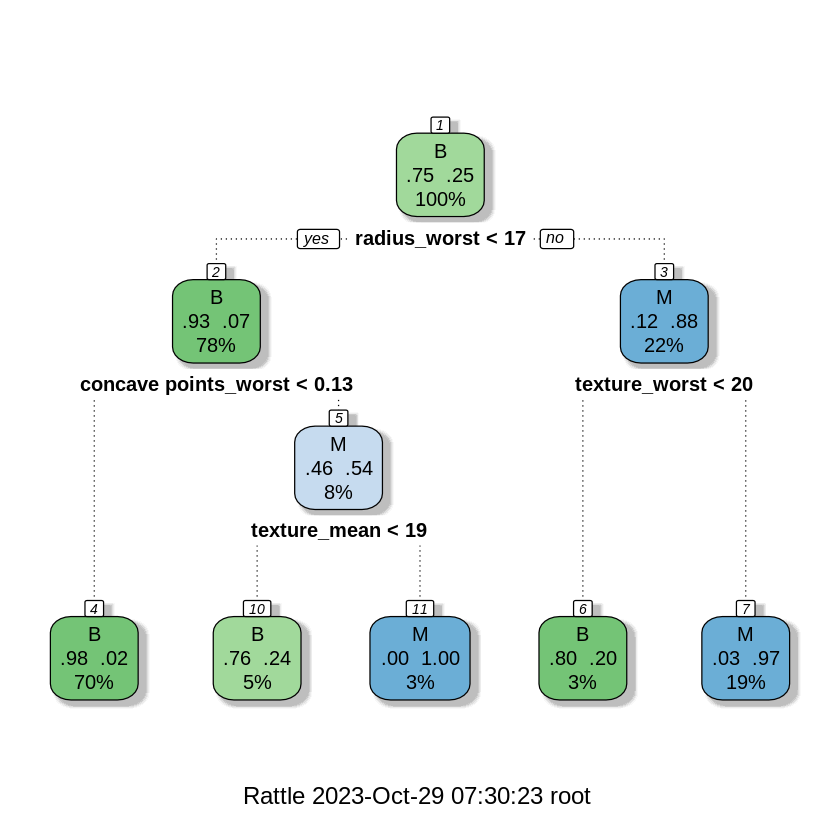

In [25]:
install.packages(c("rattle","rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

fancyRpartPlot(model_bc)

radius_worst, area_worst, perimeter_worst 순으로 Variable importance를 차지하고 있으나

1. 데이터 양이 많지 않고
2. Variable importance 값 차이가 크지 않기 때문에 예상과는 다른 결정트리가 나왔습니다.

해당 트리가 과잉적합에 빠지지 않도록 모델 model_bc에 가지치기(pruning)을 하려고 합니다.

우선, 교차 검증 오류율(xerror)이 최소가 되는 CP를 min_xerror_cp에 저장하게습니다

In [27]:
min_xerror_cp <- model_bc$cptable %>%
  as_tibble() %>%
  filter(xerror == min(xerror)) %>%
  pull(CP)
print("min_error_cp = ")
min_xerror_cp

[1] "min_error_cp = "


[1] 0.01

위에서 구한 min_xerror_cp 값을 이용하여 모델에 가지치기(pruning)를 수행하여 model_pr에 저장하겠습니다.

이후 원래 모델과 model_pr을 시각화 하여 비교해 보겠습니다.

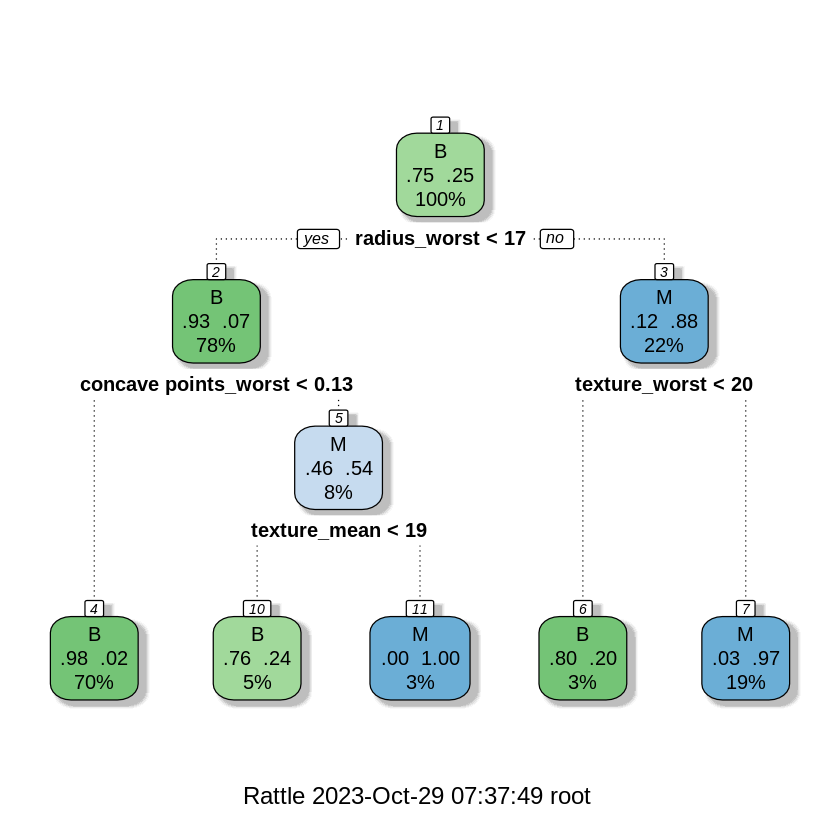

In [28]:
model_pr <- rpart::prune(model_bc, cp = min_xerror_cp)
fancyRpartPlot(model_pr)

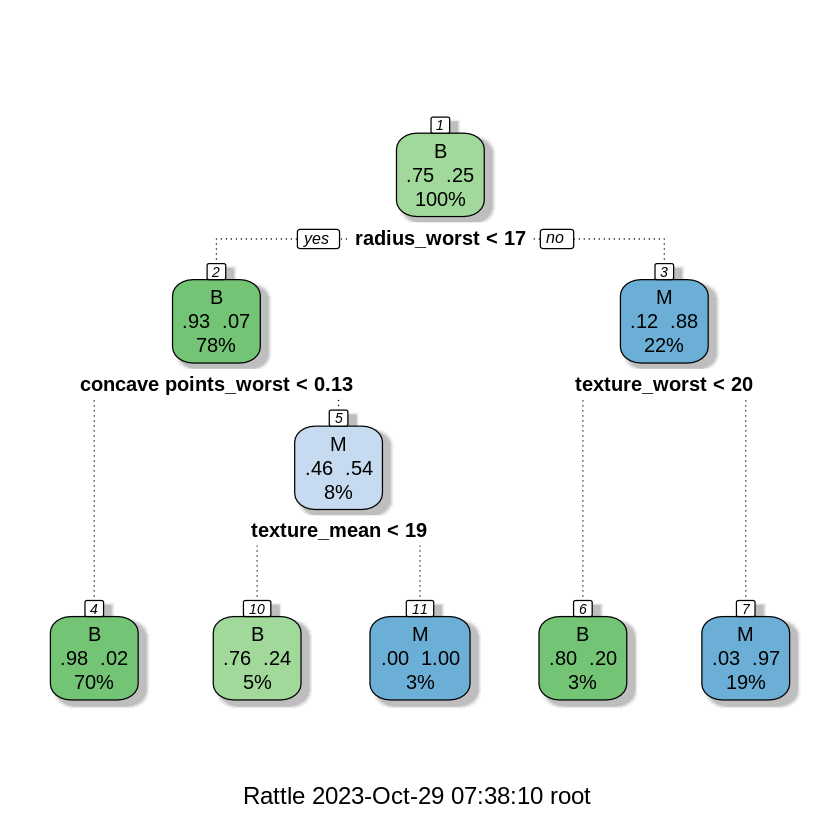

In [29]:
fancyRpartPlot(model_bc)


데이터의 크기가 그리 크지 않기 때문에 가지치기 전 후 차이가 없는 것을 확인할 수 있습니다.

model_pr을 사용하여 test 데이터로 예측을 수행한 후 예측 값을 저장하고 확인해 보겠습니다.

In [30]:
predict_value <- predict(model_pr, test, type = "class") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 39 × 1
   predict_value
   <fct>        
 1 M            
 2 B            
 3 B            
 4 M            
 5 B            
 6 B            
 7 B            
 8 M            
 9 M            
10 B            
# ℹ 29 more rows


위 문제에서 구한 predict_value와 test 데이터의 diagnosise 데이터를 묶어 predict_check에 저장하고 확인해 보겠습니다.

In [33]:
predict_check <- test %>% select(diagnosis) %>% dplyr::bind_cols(., predict_value)
predict_check

diagnosis,predict_value
<fct>,<fct>
M,M
B,B
B,B
M,M
B,B
B,B
B,B
M,M
M,M


모두 예측을 수행한 것을 확인할 수 있습니다.혼돈 메트릭스(confusionMatrix)를 활용하여 모델을 분석해 보고 프로젝트를 마무리하겠습니다.

In [34]:
cm <- caret::confusionMatrix(predict_check$predict_value, test$diagnosis)
cm

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 30  0
         M  0  9
                                     
               Accuracy : 1          
                 95% CI : (0.9097, 1)
    No Information Rate : 0.7692     
    P-Value [Acc > NIR] : 3.599e-05  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.7692     
         Detection Rate : 0.7692     
   Detection Prevalence : 0.7692     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : B          
                                     

정확도 (Accuracy): 1.0

전체 예측 중에서 올바르게 분류한 비율로, 1.0또는 100%입니다.(TP + TN) / (TP + TN + FP + FN)

민감도 (Sensitivity): 1.0

실제 양성 중에서 올바르게 양성으로 분류된 비율로, 1.0또는 100%입니다.

특이도 (Specificity): 1.0

실제 음성 중에서 올바르게 음성으로 분류된 비율로, 1.0또는 100%입니다.

정밀도 (Precision): 1.0

정밀도는 모델이 양성으로 예측한 샘플 중에서 실제로 양성인 샘플의 비율을 나타냅니다. TP / (TP + FP)

재현율 (Recall): 1.0

재현율은 실제로 양성인 샘플 중에서 모델이 양성으로 예측한 샘플의 비율을 나타냅니다. TP / (TP + FN)

데이터가 작기 때문에 가능한 결과라고 생각하지만 100프로의 정확도 및 정밀도 등을 보인다는 점이 의미가 있고 결정트리를 통해 분석하기 좋은 데이터다라는 결론을 내립니다.